******************
*******************

# **Description of data**

The dataset I will be utilizing is the Call of Duty: Modern Warfare - Players Skills set. This dataset contains data from over 1,000 players and is gathered by the use of rapid API by Alexandre Le Corre.

With this data, I plan to analyze how certain behaviors affect player skills in the game and see if there are any potential third variables that could factor in and influence results. To do this, I will be running a linear regression on player data to establish what factors impact their in-game skills.

*******************
*******************
# **Libraries**

In [1]:
# Importing libraries to be used for the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from scipy import stats

*******************
*******************
# **Getting data**

First, let's start off with retreiving the dataset to be used for our tasks. We're using the Call of Duty: Modern Warfare dataset and will import its data to create a table.

In [2]:
# Code for acquiring data
df = pd.read_csv("CallofDutyModernWarfare.csv")

Let's take a look at the data we'll be working with.

In [3]:
# Display first 5 rows of data
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
1,BOBOQQ3#7928912,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
2,TawheedAhmed42,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
3,WilcyWilson#2599001,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0
4,Manuel Alarcon1#6037069,0,0,0.0,0,1,0,0,0,0,0.0,0,0,0,0.0,0,0


In [4]:
# Display last 5 rows of data
df.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,scorePerMinute,shots,deaths
1553,Skelevra#2429467,826,25187,1.158343,19,349,11,69641,2912,4127,5.578544,522,4338,323167,93.650275,392808,21744
1554,BigGunzGaming,373,12236,1.881593,11,351,14,6559,2197,2748,23.126316,95,1122,25157,21.506600,31716,6503
1555,Wong Fei Hung#1012391,1108,31623,1.148925,18,370,13,91355,3400,5832,4.670330,728,5295,304895,125.017059,396250,27524
1556,Super-Tosto69#8537760,1117,18704,1.876216,19,433,31,14715,3509,4768,23.870748,147,863,44293,21.994300,59008,9969
1557,Killopen#6131856,1746,51595,0.920238,19,435,10,145596,6231,9673,5.227349,1192,10472,600193,110.934232,745789,56067


In [5]:
# Show data.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   hits            1558 non-null   int64  
 8   timePlayed      1558 non-null   int64  
 9   headshots       1558 non-null   int64  
 10  averageTime     1558 non-null   float64
 11  gamesPlayed     1558 non-null   int64  
 12  assists         1558 non-null   int64  
 13  misses          1558 non-null   int64  
 14  scorePerMinute  1558 non-null   float64
 15  shots           1558 non-null   int64  
 16  deaths          1558 non-null   int64  
dtypes: float64(3), int64(13), object(

In [6]:
# Show data.describe
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,413.800000,1.166620e+06,67888.000000


In [7]:
# Show data.shape
df.shape

(1558, 17)

***************
***************
# **Visualizing data**

The initial dataset is pretty clear, but let's go ahead and tidy it up a bit by simplifying and adjusting our dataset's variables so they're easier to understand.




In [8]:
# Cleaning up the variable names so they are easier to understand
df.rename(columns={'name':'Username of Player'}, inplace=True)
df.rename(columns={'wins':'Match Wins'}, inplace=True)
df.rename(columns={'kills':'Match Kills'}, inplace=True)
df.rename(columns={'kdRatio':'Kill/Death Ratio'}, inplace=True)
df.rename(columns={'killstreak':'Kill Streak'}, inplace=True)
df.rename(columns={'level':'Level'}, inplace=True)
df.rename(columns={'losses':'Match Losses'}, inplace=True)
df.rename(columns={'hits':'Enemy Hits'}, inplace=True)
df.rename(columns={'timePlayed':'Hours Played'}, inplace=True)
df.rename(columns={'headshots':'Headshots'}, inplace=True)
df.rename(columns={'averageTime':'Average Hours Played per Day'}, inplace=True)
df.rename(columns={'gamesPlayed':'Number of Multiplayer Matches Played'}, inplace=True)
df.rename(columns={'assists':'Assisted Kills'}, inplace=True)
df.rename(columns={'misses':'Missed Hits'}, inplace=True)
df.rename(columns={'scorePerMinute':'Points Gained per Minute'}, inplace=True)
df.rename(columns={'shots':'Shots Taken'}, inplace=True)
df.rename(columns={'deaths':'Player Deaths'}, inplace=True)

First, I want to see just how long people typically spent playing Call of Duty per day. 

Text(0.5, 1.0, 'Average Amount of Hours Spent Playing Call of Duty per Day')

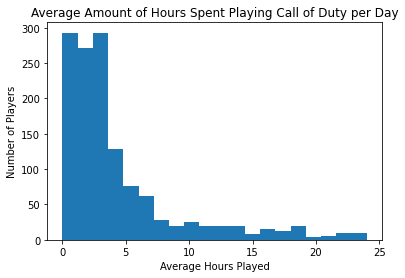

In [9]:
# visualization 1
# Creating a histogram based on number of players and their average hours spent playing CoD per day
plt.hist(df["Average Hours Played per Day"], bins=20, range = [0,24])
plt.xlabel('Average Hours Played')
plt.ylabel('Number of Players')
plt.title('Average Amount of Hours Spent Playing Call of Duty per Day')

From the visual above, there are quite a lot of players who have 0 in-game hours. These are most likely players who have created an account in CoD but never actually played. 

To get a better visualizations for hours spent playing as well as getting more accurate analyses for our other tasks, we should remove all the players who haven't played the game.

In [10]:
# Drop any missing data for players with 0 in-game hours
df.drop(df[df['Average Hours Played per Day'] < 1].index, inplace = True)

df.shape

(1348, 17)

Now that we've dropped the missing player data, let's redo our first histogram again for hours spent playing CoD per day.

Text(0.5, 1.0, 'Average Amount of Hours Spent Playing Call of Duty per Day')

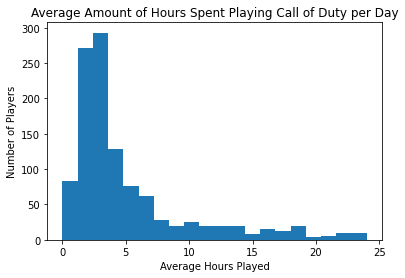

In [11]:
# visualization 1
# Creating a histogram based on number of players and their average hours spent playing CoD per day
plt.hist(df["Average Hours Played per Day"], bins=20, range = [0,24])
plt.xlabel('Average Hours Played')
plt.ylabel('Number of Players')
plt.title('Average Amount of Hours Spent Playing Call of Duty per Day')

Based on the visual above, it seems that most players spend around 2-3 hours per day playing CoD.

For this next part, I want to know if the amount of match wins is associated with the total number of hours spent playing the game.

Text(0.5, 1.0, 'Match Wins by Total Number of Hours Spent Playing CoD')

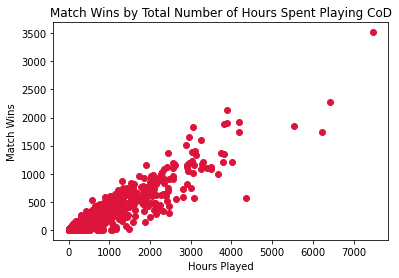

In [12]:
# visualization 2
# Creating a scatterplot for amount of matchs won by total hours played
plt.scatter('Hours Played', 'Match Wins', data=df, color = 'crimson')
plt.xlabel('Hours Played', fontsize='medium')
plt.ylabel('Match Wins', fontsize='medium')
plt.title("Match Wins by Total Number of Hours Spent Playing CoD")

It seems that match wins do increase as there are more hours dedicated to playing CoD.

Now for this next visual, I want to check if the Kill/Death ratio is influenced by the total amount of hours played.

Text(0.5, 1.0, 'Kill/Death Ratio by Total Number of Hours Spent Playing CoD')

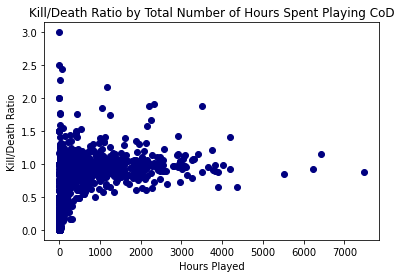

In [13]:
# visualization 3
# Creating a scatterplot for kill/death ratios by total hours played
plt.scatter('Hours Played', 'Kill/Death Ratio', data=df, color = 'navy')
plt.xlabel('Hours Played', fontsize='medium')
plt.ylabel('Kill/Death Ratio', fontsize='medium');
plt.title("Kill/Death Ratio by Total Number of Hours Spent Playing CoD")

Interesting! It doesn't seem like the total amount of hours played in CoD really affects how a person's kill/death ratio is. Seems like on average, most people have ratios around 1.0 despite having played a large amount or little amount of hours.

Now I want to explore just what level these sort of players are. Since there's such a large range in which levels can be, I should separate levels into different tier ranks. 
I will be going by 4 different categories with different level ranges:

*   Novice: Lvl 1-30
*   Intermediate: Lvl 30-85
*   Advanced: Lvl 85-150
*   Elite: Lvl 150+

Text(0.5, 1.0, 'Tier Levels of Players')

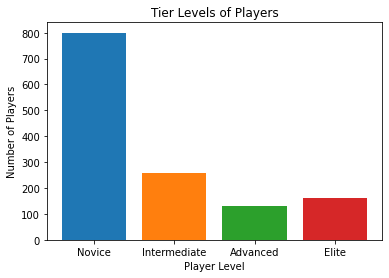

In [14]:
# visualization 4
# Reorganizing levels into tiers to better view the data
novice = df[df.Level<=30]
intermediate = df[(df.Level>30) & (df.Level<=85)]
advanced = df[(df.Level>85) & (df.Level<=150)]
elite = df[df.Level>150]

# Generating a bar chart
var1=plt.bar('Novice',novice.count())
var2=plt.bar('Intermediate',intermediate.count())
var3=plt.bar('Advanced',advanced.count())
var4=plt.bar('Elite',elite.count())
plt.xlabel("Player Level")
plt.ylabel("Number of Players")
plt.title("Tier Levels of Players")

This visual shows that there is a significant larger amount of novice players in comparison to intermediate, advanced, and elite. 

Let's see what the kill/ratio looks like within these tier levels

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


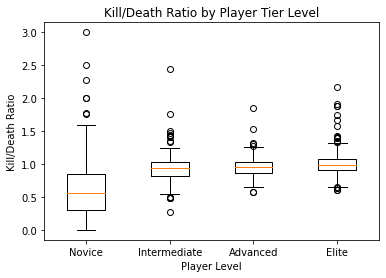

In [15]:
# visualization 5
# Creating a boxplot
kdratio = [novice['Kill/Death Ratio'], intermediate['Kill/Death Ratio'], advanced['Kill/Death Ratio'], elite['Kill/Death Ratio']]
fig, ax = plt.subplots()
ax.boxplot(kdratio)
ax.set_title('Kill/Death Ratio by Player Tier Level')
ax.set_xlabel('Player Level')
ax.set_ylabel('Kill/Death Ratio')
ax.set_xticklabels(['Novice', 'Intermediate', 'Advanced', 'Elite'])
plt.show()

Not too surprising here, but it would appear that higher level players have better average kill/death ratios with less deviation.

Now I'll be creating a confusion matrix to better see the correlations between match kills, enemy hits, headshots, assisted kills, missed hits, and shots taken.

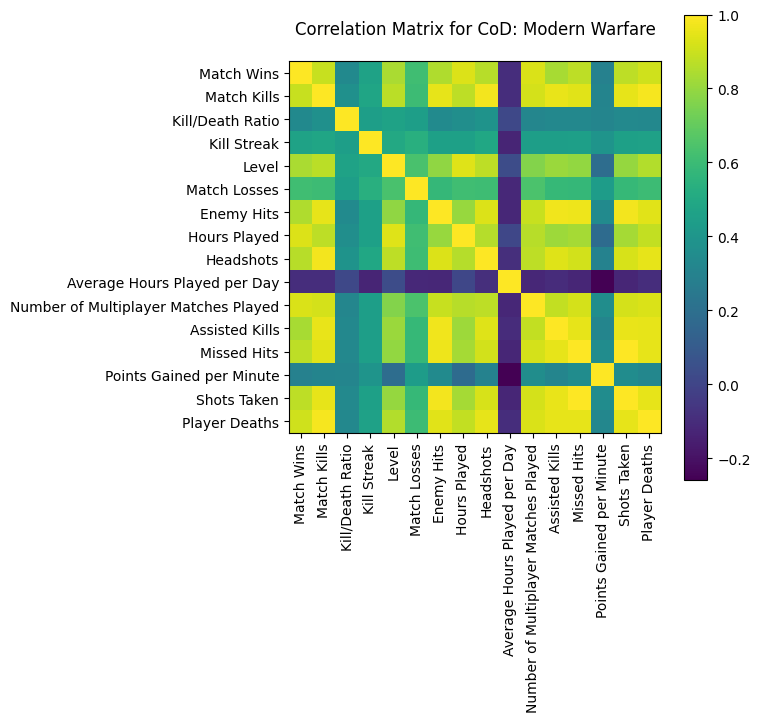

In [49]:
# visualization 6
# Creating a correlation matrix
corr = df.corr()
ax.matshow(corr, cmap=plt.get_cmap('Greens'))
plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w')
corr_mat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corr_mat)
plt.title(f'Correlation Matrix for CoD: Modern Warfare', fontsize=12)
plt.show()

***************
***************
# **Feature Engineering**

Here, I will do some feature enginerring to show whether or  not there is any missing data, duplicates, and outliers.

For the first task of missing data, we've already removed players previously (in visualizations) who had 0 in-game hours because they did not actually play the game.

In [34]:
# Check and take care of null values
dropped_rows = df.dropna()

df.shape

(1348, 17)

Next, I'll check for any duplicates players in the dataset and drop them if there any.

In [19]:
# Check and take care of string values
# Dropping any duplicates in data
df = df.drop_duplicates(subset=['Username of Player'])

df.shape

(1348, 17)

Now, it's time to check for outliers remove any that are found.

In [20]:
# Check and take care of outliers
# Computing IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Match Wins                                223.250000
Match Kills                              4632.500000
Kill/Death Ratio                            0.497302
Kill Streak                                13.000000
Level                                      62.250000
Match Losses                                9.000000
Enemy Hits                              12475.000000
Hours Played                              607.750000
Headshots                                 845.250000
Average Hours Played per Day                9.650583
Number of Multiplayer Matches Played      148.250000
Assisted Kills                            795.750000
Missed Hits                             55969.000000
Points Gained per Minute                  234.554108
Shots Taken                             68370.000000
Player Deaths                            4949.250000
dtype: float64


In [37]:
# Removing outliers
df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Username of Player,Match Wins,Match Kills,Kill/Death Ratio,Kill Streak,Level,Match Losses,Enemy Hits,Hours Played,Headshots,Average Hours Played per Day,Number of Multiplayer Matches Played,Assisted Kills,Missed Hits,Points Gained per Minute,Shots Taken,Player Deaths
210,McWiggins14#5533106,1,6,0.428571,1,1,0,29,1,1,1.000000,0,1,96,226.200000,125,14
211,clastic_skyline#2465354,1,1,0.500000,0,1,0,0,1,0,1.000000,0,0,0,0.000000,0,2
212,nicocrack120#3055300,1,0,0.000000,0,1,0,0,1,0,1.000000,0,0,0,0.000000,0,2
213,S1806Oliver#3355454,1,0,0.000000,0,1,0,0,1,0,1.000000,0,0,0,0.000000,0,2
214,Not-yan333#8399938,1,3,1.500000,0,1,0,0,1,0,1.000000,0,0,0,0.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,_Loki_23#6617235,224,6840,0.721747,19,137,7,22515,1399,1102,8.967949,156,1306,112017,80.906934,134532,9477
1373,Soriba_Ps#1553042,396,8376,0.979420,14,141,6,21631,1035,1361,5.750000,180,1524,87000,115.161739,108631,8552
1391,InsaneHorse#4943336,402,8388,0.868683,12,147,10,15559,1489,1493,8.048649,185,1405,86338,86.868234,101897,9656
1401,BArrrrrios,276,4790,0.970618,11,152,10,10384,1320,639,15.000000,88,811,49914,44.192727,60298,4935


Looks like there was quite a lot of outliers in the dataset. I have now removed them from the data.

***************
***************
# **Analysis section**

For this section, I will be using Random forest as binary classification to make probabilistic observations of the Call of Duty dataset.

First I need to split features and targets.





In [38]:
# Machine Learning 1
# Split into features and target
Y = df['Match Kills']
train_predictor_columns = ['Enemy Hits', 'Headshots', 'Assisted Kills', 'Missed Hits', 'Shots Taken']
X = df[train_predictor_columns]

# Split features and target into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Fit the RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, Y_train)

# Make predictions and probabilities for the test set
Y_pred = forest.predict(X_test)
Y_prob = forest.predict_proba(X_test)[:, 1]

# View confusion matrix for test data and predictions
confusion_matrix(Y_test, Y_pred)

array([[8, 0, 0, ..., 0, 0, 0],
       [9, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Using these, I can determine the random forest score.

In [39]:
# Random forest score
print("Random forest score :", forest.score(X_test, Y_test))

Random forest score : 0.06403940886699508


Next, I'll check on my predictions using the Random Forest Regressor.

In [40]:
# Fit RandomForestRegressor
my_model = RandomForestRegressor()
my_model.fit(X_train, Y_train)

# Test
X_test = df[train_predictor_columns]

# Print predictions
Y_pred_test = my_model.predict(X_test)
print(Y_pred_test)

[6.50000000e+00 1.61185208e+00 1.61185208e+00 ... 3.19898300e+04
 2.06696200e+04 4.86391900e+04]


I should then calculate for the Receiver Operating Characteristics and Area Under The Curve.

In [33]:
# Calculating ROC AUC Score
roc_value = roc_auc_score(Y_test, Y_prob)

ValueError: ignored

Uh oh. It seems there is an error in my coding. I'm having some trouble with determining the ROC AOC values due to a multi_class error.

In [41]:
# View the classification report to see accuracy and F-1
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.32      1.00      0.48         8
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         5
           3       0.11      0.50      0.18         2
           4       0.00      0.00      0.00         3
           5       0.25      0.33      0.29         3
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Despite the setback with the ROC AOC values, I still was able to retrieve the accuracy and F-1 scores.

***************
***************
# **Conclusions**

Based on the analyses made above, I can gauge how players in Call of Duty: Modern Warfare can improve their skills and peformance. In the second visualization of my scatterplot, I was able to determine  that there was a positive correlation in match wins by number of hours spent playing in-game total. This would suggest that as more hours were dedicated to playing the game, there was a higher chance of match wins. Yet, when it came to kill/death ratios, the amount of play time did not result in a large impact on the variable. In fact, most kill/death ratios fell upon an average of 1.0, suggesting that kill/death ratio didn't correlate with more time spent practicing or playing the game.

When splitting the data into different tier levels: novice, intermediate, advanced, and elite, kill/death ratios did vary in medians and deviations. It seemed for novices, there wasa a wider range of ratios in comparison to players at  greater levels. This could be explained since newer players are not yet adjusted to the game and will vary greatly in their experiences wheras higher tier players are more adjusted to the game and therefore are more established, leaving less room for variety. 

In the correlation matrix, we can see there are some correlations across cetain variables. I wanted to explore how match wins andcorrelated to other factors. Match wins seemed to be strongly correlated the amount of match kills, enemy hits, assited kills, and level of the player. In order to win matches, it is expected that there should be a postivie correlation to kills and assists in order to secure victory. Level likely played a role due to increased experience from the player and more game time.
 
There is a third varaible that presents itself as a contributing factor to skill level of players. Although it was examined that more hours spent playing correlated with more wins and kills, this is not necessarily becuse of more gained experience but rather it's only natural that the more hours one spends playing the game , the more matches they partake it, and the more potential there is to win one.